# Classification/Regression of Iris Dataset

## Basic plots

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,6)
sns.set(style='white', color_codes=True)

iris = pd.read_csv('iris.csv')

In [2]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

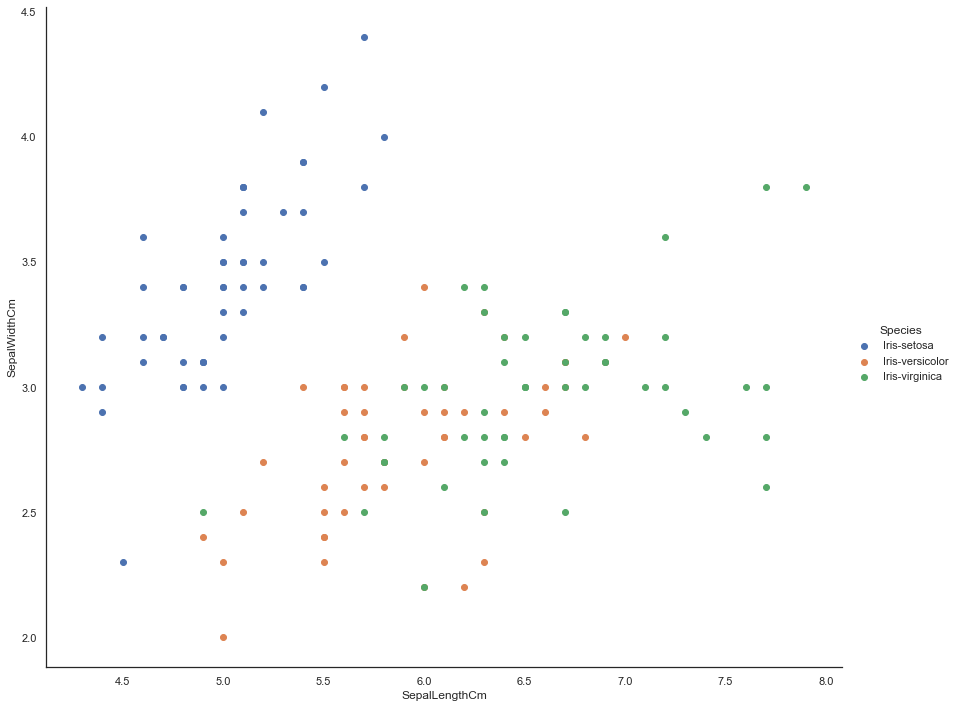

In [4]:
g = sns.FacetGrid(iris, hue='Species', height=10, aspect=1.2)
g.map_dataframe(plt.scatter, x='SepalLengthCm', y='SepalWidthCm')
g.add_legend()

sns.set(font_scale=2)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

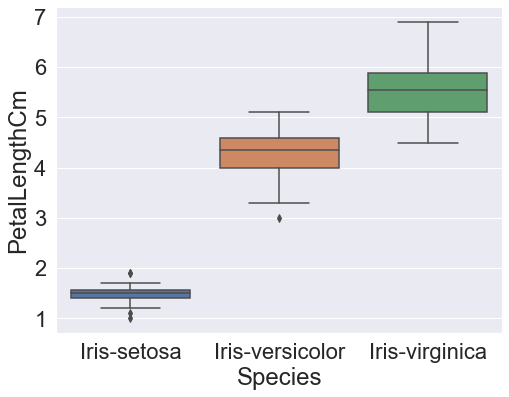

In [9]:
sns.boxplot(x='Species', y='PetalLengthCm', data=iris)

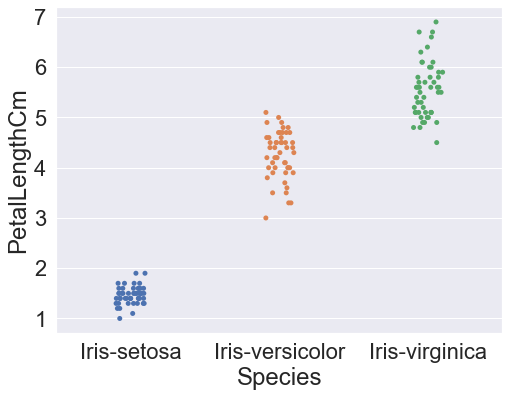

In [8]:
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

In [12]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

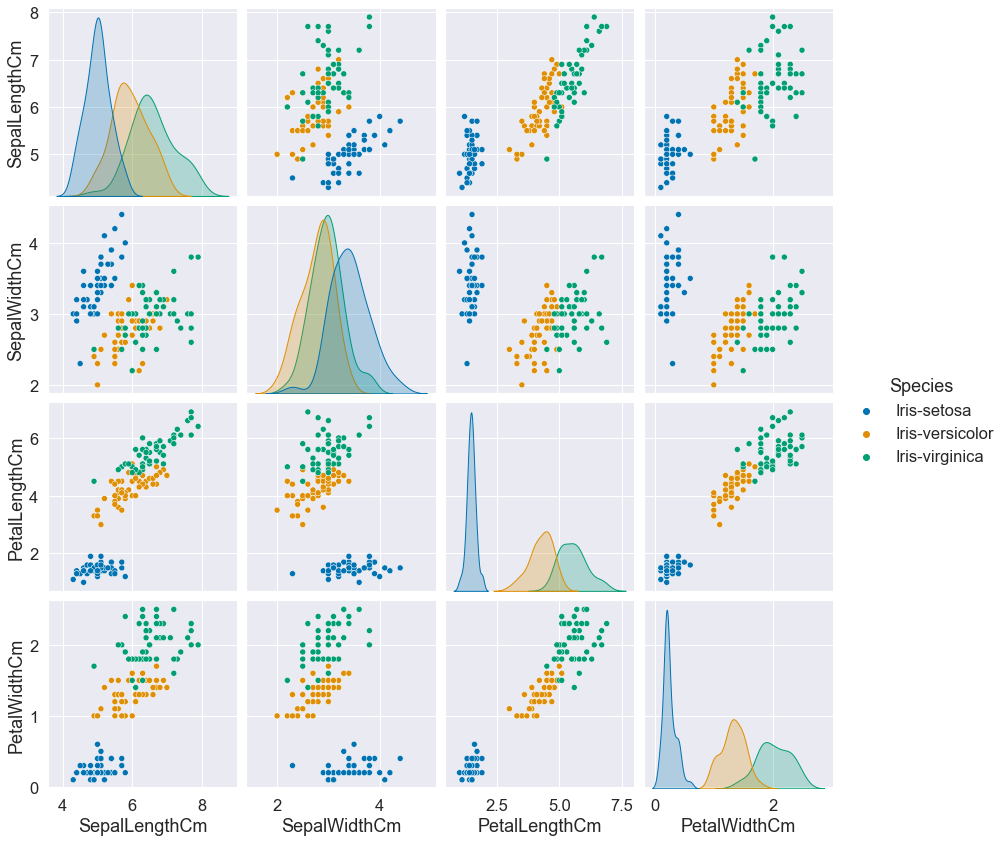

In [30]:
sns.set(font_scale=1.5)
sns.pairplot(iris.drop('Id', axis=1), hue='Species', height=3, palette='colorblind')

<AxesSubplot:>

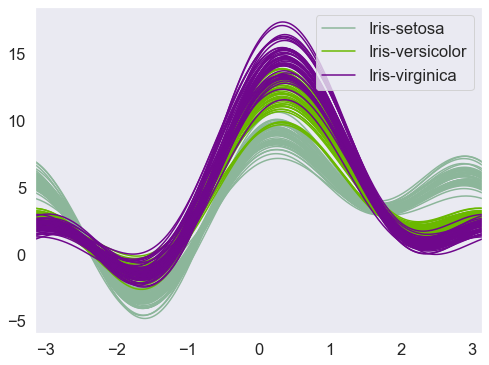

In [29]:
from pandas.plotting import andrews_curves

sns.set(font_scale=1.5)
andrews_curves(iris.drop('Id', axis=1), 'Species')

## Classification

In [155]:
from sklearn.model_selection import train_test_split        # for using cross_validation
from sklearn.tree import DecisionTreeClassifier, plot_tree  # for using decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier          # for K nearest neighbours
from sklearn import metrics                                 # for checking the model accuracy

# drop the attribute 'Id'
iris = pd.read_csv('iris.csv').drop('Id', axis=1)

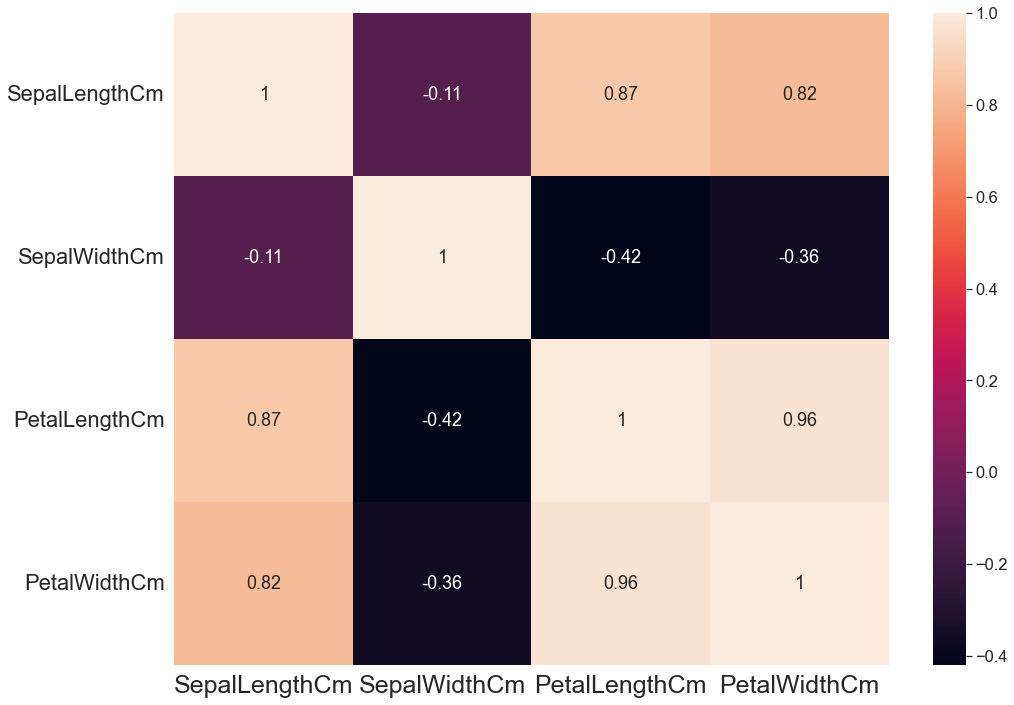

In [156]:
# check the correlation between features (attributes)
plt.figure(figsize=(16,12))
sns.heatmap(iris.corr(), annot=True)
plt.xticks(rotation=0, fontsize=25)
plt.yticks(rotation=0, fontsize=22)
plt.show()

In [157]:
# Split the train and test data for cross validation
train, test = train_test_split(iris, test_size=0.3)

# The training input data features (SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm)
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# The training output (Species)
train_Y = train.Species
# The testing imput data
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# The testing output (Species)
test_Y = test.Species

test_Y.shape

(45,)

In [168]:
# Apply the decision tree algorithm
model_d = DecisionTreeClassifier()
# Train the model with training data
model_d.fit(train_X,train_Y)
# Predict the model ouput with test data
prediction_d = model_d.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction_d,test_Y))

The accuracy of the Decision Tree is 0.9555555555555556


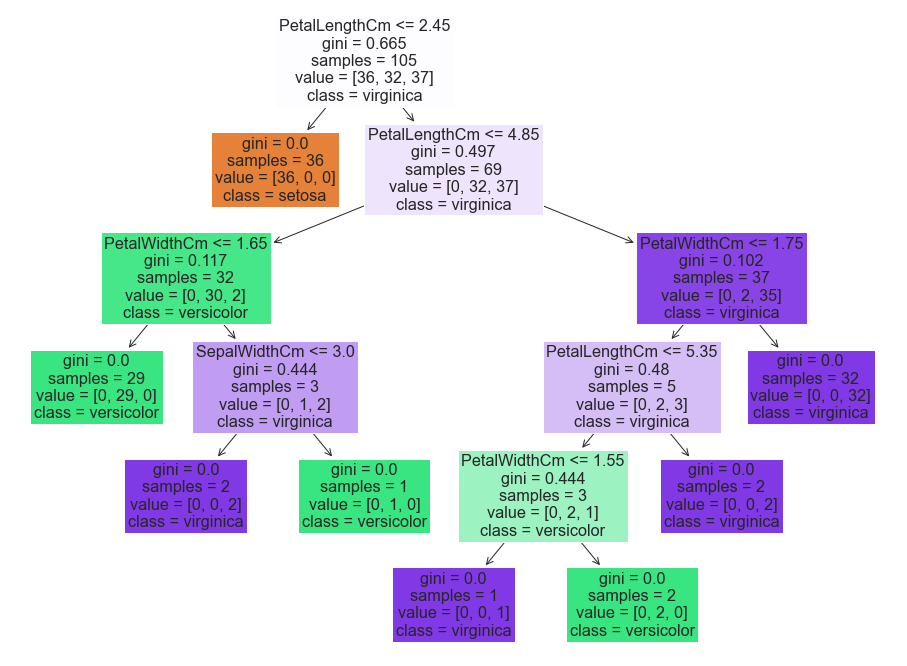

In [159]:
# Plot the decision tree

fn = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn = ['setosa', 'versicolor', 'virginica']

plt.figure(figsize=(16,12))
plot_tree(model_d, feature_names=fn, class_names=cn, filled=True)
plt.show()

In [167]:
# Apply the K nearest neighbors algorithm
model_k = KNeighborsClassifier(n_neighbors=3)
# Train the model with training data
model_k.fit(train_X,train_Y)
# Predict the model ouput with test data
prediction_k = model_k.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction_k,test_Y))

The accuracy of the KNN is 0.9555555555555556


In [166]:
from sklearn.metrics import classification_report

print(classification_report(test_Y, prediction_k))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



### Stratified K-Fold cross validation

In [140]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean, std

# Split the training set and tesing set
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = iris.Species

print(X.shape)

# 10 stratified cross validation splits
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
# Decision tree algorithm
model_dk = DecisionTreeClassifier()

scores_dk = cross_val_score(model_dk, X, Y, cv=skf)

print('The mean accuracy of Decision Tree algorithm is %.3f, the std is %.3f' % (mean(scores_dk), std(scores_dk)))

(150, 4)
The mean accuracy of Decision Tree algorithm is 0.940, the std is 0.070


In [148]:
model_kk = KNeighborsClassifier(n_neighbors=5)
scores_kk = cross_val_score(model_kk, X, Y, cv=skf)

print('The mean accuracy of K-nearest neighbors algorithm is %.3f, the std is %.3f' % (mean(scores_kk), std(scores_kk)))

The mean accuracy of K-nearest neighbors algorithm is 0.967, the std is 0.033


### Seperate classification: Petal, Sepal

In [147]:
# Now use Petals and Sepals Seperately
petal=iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal=iris[['SepalLengthCm','SepalWidthCm','Species']]

petal_x = petal[['PetalLengthCm', 'PetalWidthCm']]
petal_y = petal.Species

sepal_x = sepal[['SepalLengthCm','SepalWidthCm']]
sepal_y = sepal.Species

In [151]:
# 10 stratified cross validation splits
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model_kk = KNeighborsClassifier(n_neighbors=5)

scores_pkk = cross_val_score(model_kk, petal_x, petal_y, cv=skf)
scores_skk = cross_val_score(model_kk, sepal_x, sepal_y, cv=skf)

print('The mean accuracy of Petal classification is %.3f, the std is %.3f' % (mean(scores_pkk), std(scores_pkk)))
print('\n')
print('The mean accuracy of Sepal classification is %.3f, the std is %.3f' % (mean(scores_skk), std(scores_skk)))


The mean accuracy of Petal classification is 0.960, the std is 0.044


The mean accuracy of Sepal classification is 0.760, the std is 0.140
